In [198]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
# Read dataset
df = pd.read_csv("1_lebron_james_shot_chart_1_2023.csv")


In [200]:
print(f"Initial columns: {df.columns.tolist()}\n")

df['score_difference'] = df['lebron_team_score'] - df['opponent_team_score']
# Drop columns
columns_to_drop = [
    "season",
    "color",
    "opponent_team_score",
    "date",
    "qtr",
    "time_remaining",
    "lebron_team_score",
    "lead",
    "opponent",
    "team",
    "top",
    "left",
]
df.drop(columns_to_drop, axis=1, inplace=True)
print(f"Final head:\n{df.head()}")

Initial columns: ['top', 'left', 'date', 'qtr', 'time_remaining', 'result', 'shot_type', 'distance_ft', 'lead', 'lebron_team_score', 'opponent_team_score', 'opponent', 'team', 'season', 'color']

Final head:
   result  shot_type  distance_ft  score_difference
0   False          3           26                 0
1   False          2           16                -1
2   False          2           11                -3
3    True          2            3                -7
4   False          3           23                -1


In [201]:
# Split data
X = df.drop(columns=["result"])
y = df.result.astype("int")

print(X.head())
print("\n", y.head())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16
)


   shot_type  distance_ft  score_difference
0          3           26                 0
1          2           16                -1
2          2           11                -3
3          2            3                -7
4          3           23                -1

 0    0
1    0
2    0
3    1
4    0
Name: result, dtype: int64


In [202]:
# Initialize model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Confusion matrix: [[123  53]
 [ 63 145]]


Text(0.5, 427.9555555555555, 'Predicted label')

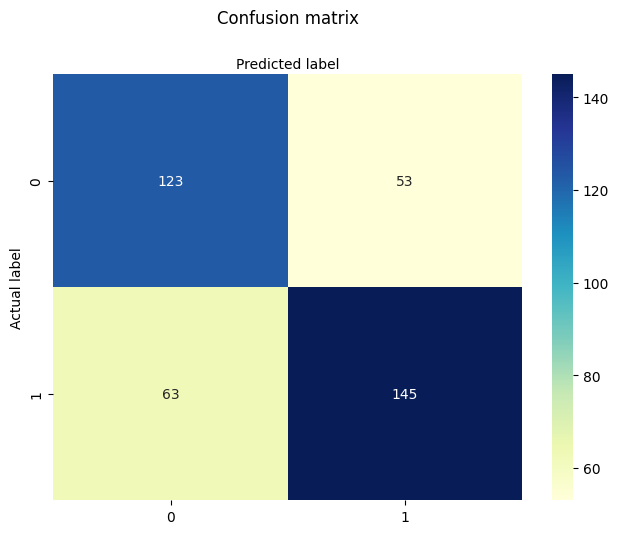

In [203]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion matrix: {cnf_matrix}")

class_names = y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [204]:
# Show metrics
target_names = ["Shot Miss", "Shot Make"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Shot Miss       0.66      0.70      0.68       176
   Shot Make       0.73      0.70      0.71       208

    accuracy                           0.70       384
   macro avg       0.70      0.70      0.70       384
weighted avg       0.70      0.70      0.70       384



In [205]:
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean():.3f}")

Cross-validation accuracy: 0.668


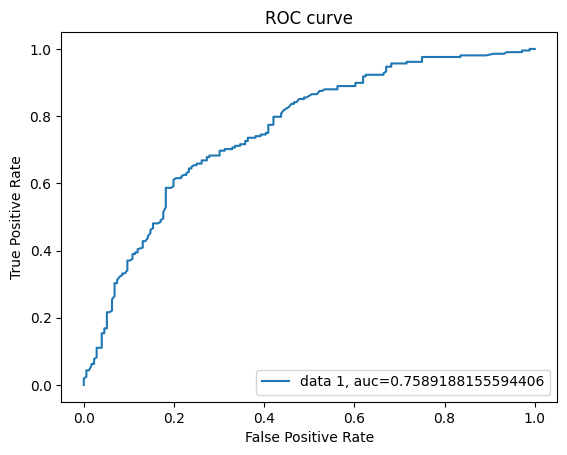

In [206]:
# ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()